In [1]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")







   Updating registry at `C:\Users\dhruv\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\dhruv\.julia\environme

In [2]:
#plot for plotting
#Lathe all in one package for predictive modelling object oriented method 
#GLM contains linear regression package genralized linear model
#statsplots is next gen plots kind of
#MLBase for machine learning algorithms
#cross validation we should use 9:1


In [3]:
using Statistics
using StatsPlots
using MLBase
ENV["COLUMNS"]=1000

1000

In [4]:
using CSV
using DataFrames
df=DataFrame(CSV.File("Life_Expectancy.csv"))
first(df,5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
,String,Int64,String,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.2796,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259,3.37365e7,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.5236,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.697,327582.0,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.2192,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.745,3.17317e7,17.7,17.7,0.47,9.9
4,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.1842,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959,3.69696e6,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.09711,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.5372,2.9786e6,18.2,18.2,0.454,9.5


In [5]:
println(size(df))

(2938, 22)


In [6]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Country,,Afghanistan,,Zimbabwe,0,String
2,Year,2007.52,2000,2008.0,2015,0,Int64
3,Status,,Developed,,Developing,0,String
4,Life expectancy,69.2249,36.3,72.0,89.0,0,Float64
5,Adult Mortality,164.796,1.0,144.0,723.0,0,Float64
6,infant deaths,30.3039,0,3.0,1800,0,Int64
7,Alcohol,4.60286,0.01,4.16,17.87,0,Float64
8,percentage expenditure,738.251,0.0,64.9129,19479.9,0,Float64
9,Hepatitis B,80.9405,1.0,87.0,99.0,0,Float64


In [7]:
names(df)

22-element Array{String,1}:
 "Country"
 "Year"
 "Status"
 "Life expectancy "
 "Adult Mortality"
 "infant deaths"
 "Alcohol"
 "percentage expenditure"
 "Hepatitis B"
 "Measles "
 " BMI "
 "under-five deaths "
 "Polio"
 "Total expenditure"
 "Diphtheria "
 " HIV/AIDS"
 "GDP"
 "Population"
 " thinness  1-19 years"
 " thinness 5-9 years"
 "Income composition of resources"
 "Schooling"

In [8]:
colnames=Symbol[]
for i in string.(names(df))
    push!(colnames,Symbol(replace(replace(replace(strip(i)," "=> "_"),"-"=>"_"),"/"=> "_")))
end
rename!(df,colnames);
    
    

In [9]:
#outliner analysis using box plot

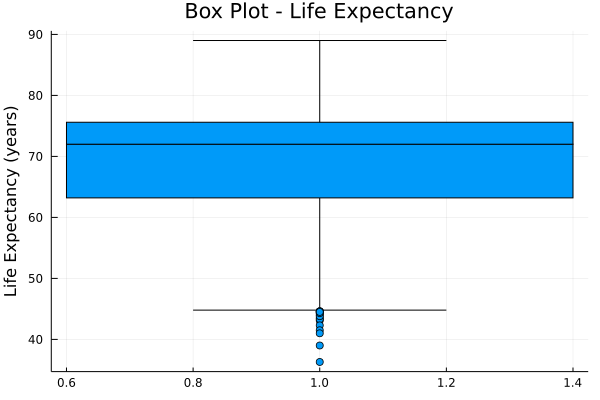

In [10]:
boxplot(df.Life_expectancy, title ="Box Plot - Life Expectancy", ylabel="Life Expectancy (years)", legend=false)

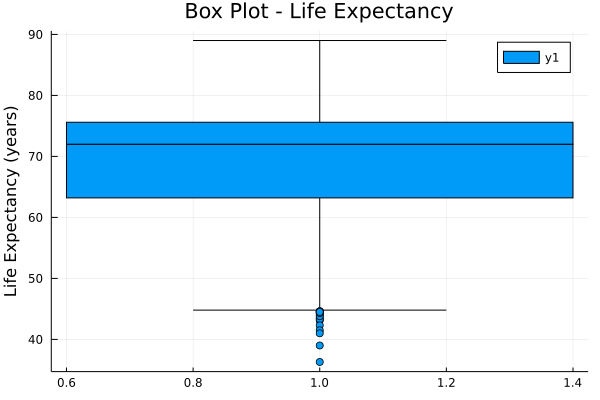

In [11]:
boxplot(df.Life_expectancy, title ="Box Plot - Life Expectancy", ylabel="Life Expectancy (years)", legend=true)

In [12]:
first_percentile=percentile(df.Life_expectancy,25)
iqr_value=iqr(df.Life_expectancy)
df=df[df.Life_expectancy .> (first_percentile - 1.5*iqr_value),:];

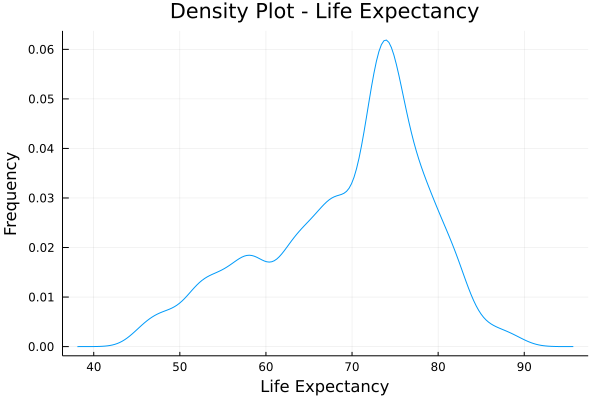

In [13]:
density(df.Life_expectancy ,title="Density Plot - Life Expectancy",ylabel="Frequency",xlabel="Life Expectancy",legend=false)

In [14]:
println("Correlation of life expectancy with adult mortality rate is",cor(df.Adult_Mortality,df.Life_expectancy),"\n\n")

Correlation of life expectancy with adult mortality rate is-0.6890364947023733




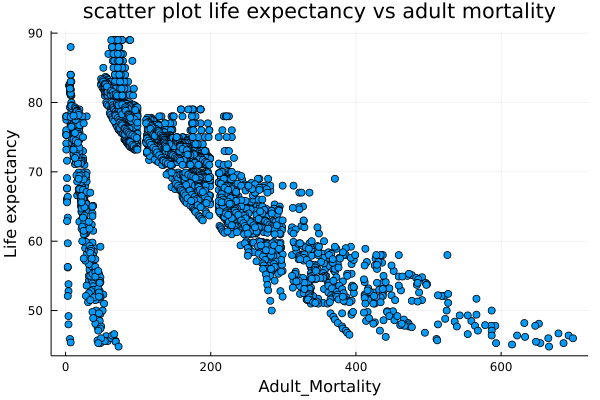

In [15]:
train_plot=scatter(df.Adult_Mortality,df.Life_expectancy,title="scatter plot life expectancy vs adult mortality",ylabel="Life expectancy",xlabel="Adult_Mortality",legend=false)

In [16]:
df=df[:,Not(:Country)];

In [17]:
df=df[:,Not(:Status)];

In [18]:
df

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2015,65.0,263.0,62,0.01,71.2796,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259,3.37365e7,17.2,17.3,0.479,10.1
2,2014,59.9,271.0,64,0.01,73.5236,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.697,327582.0,17.5,17.5,0.476,10.0
3,2013,59.9,268.0,66,0.01,73.2192,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.745,3.17317e7,17.7,17.7,0.47,9.9
4,2012,59.5,272.0,69,0.01,78.1842,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959,3.69696e6,17.9,18.0,0.463,9.8
5,2011,59.2,275.0,71,0.01,7.09711,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.5372,2.9786e6,18.2,18.2,0.454,9.5
6,2010,58.8,279.0,74,0.01,79.6794,66.0,1989,16.7,102,66.0,9.2,66.0,0.1,553.329,2.88317e6,18.4,18.4,0.448,9.2
7,2009,58.6,281.0,77,0.01,56.7622,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893,284331.0,18.6,18.7,0.434,8.9
8,2008,58.1,287.0,80,0.03,25.8739,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361,2.72943e6,18.8,18.9,0.433,8.7
9,2007,57.5,295.0,82,0.02,10.9102,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.836,2.66168e7,19.0,19.1,0.415,8.4


In [19]:
Pkg.add("Lathe")
using Lathe.preprocess: TrainTestSplit
train,test=TrainTestSplit(df,.75)

  Resolving package versions...
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Manifest.toml`


(2161×20 DataFrame
  Row │ Year   Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  BMI      under_five_deaths  Polio    Total_expenditure  Diphtheria  HIV_AIDS  GDP        Population      thinness__1_19_years  thinness_5_9_years  Income_composition_of_resources  Schooling 
      │ Int64  Float64          Float64          Int64          Float64  Float64                 Float64      Int64    Float64  Int64              Float64  Float64            Float64     Float64   Float64    Float64         Float64               Float64             Float64                          Float64   
──────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │  2014             59.9            271.0    

In [20]:
using Pkg
Pkg.add("GLM") 
using GLM

  Resolving package versions...
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Manifest.toml`


In [21]:

fm= @formula(Life_expectancy ~ Adult_Mortality)
linearRegressor=lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Life_expectancy ~ 1 + Adult_Mortality

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)      78.1051      0.248256   314.62    <1e-99  77.6183     78.592
Adult_Mortality  -0.0536741   0.0012251  -43.81    <1e-99  -0.0560766  -0.0512716
─────────────────────────────────────────────────────────────────────────────────

In [22]:
r2(linearRegressor)

0.47063900064781683

In [23]:
ypredicted_test=predict(linearRegressor,test)
ypredicted_train=predict(linearRegressor,train)
#test performance DataFrame(compute squared error)
performance_testdf=DataFrame(y_actual=test[!,:Life_expectancy],y_predicted=ypredicted_test)
performance_testdf.error=performance_testdf[!,:y_actual]-performance_testdf[!,:y_predicted]
performance_testdf.error_sq=performance_testdf.error.*performance_testdf.error;
#train performance df
performance_traindf=DataFrame(y_actual=train[!,:Life_expectancy],y_predicted=ypredicted_train)
performance_traindf.error=performance_traindf[!,:y_actual]-performance_traindf[!,:y_predicted]
performance_traindf.error_sq=performance_traindf.error.*performance_traindf.error;



In [24]:
#MAPE function defination
function mape(performance_df)
    mape=mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

mape (generic function with 1 method)

In [25]:
function rmse(performance_df)
    rmse=sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

rmse (generic function with 1 method)

In [26]:
#test error
println("MEAN ABS TEST ERROR: ",mean(abs.(performance_testdf.error)),"\n")
println("MEAN ABS Percetage test error: ",mape(performance_testdf),"\n")
println("root mean sq error: ",rmse(performance_testdf),"\n")
println("MEAN SQ TEST ERROR: ",mean(performance_testdf.error_sq),"\n")

MEAN ABS TEST ERROR: 4.472254342844697

MEAN ABS Percetage test error: 0.06796331839357454

root mean sq error: 6.356173559548708

MEAN SQ TEST ERROR: 40.400942319106086



In [27]:
#train error
println("MEAN ABS train ERROR: ",mean(abs.(performance_traindf.error)),"\n")
println("MEAN ABS Percetage train error: ",mape(performance_traindf),"\n")
println("root mean sq error: ",rmse(performance_traindf),"\n")
println("MEAN SQ train ERROR: ",mean(performance_traindf.error_sq),"\n")

MEAN ABS train ERROR: 4.849481656570806

MEAN ABS Percetage train error: 0.07446315844393774

root mean sq error: 6.886136706938384

MEAN SQ train ERROR: 47.41887874664421



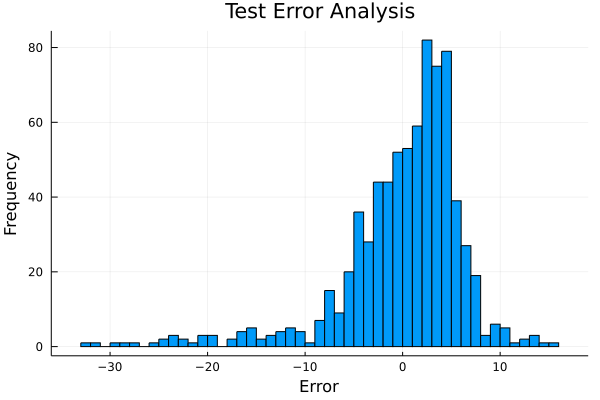

In [28]:
histogram(performance_testdf.error,bins=50,title="Test Error Analysis",ylabel="Frequency",xlabel="Error",legend=false)

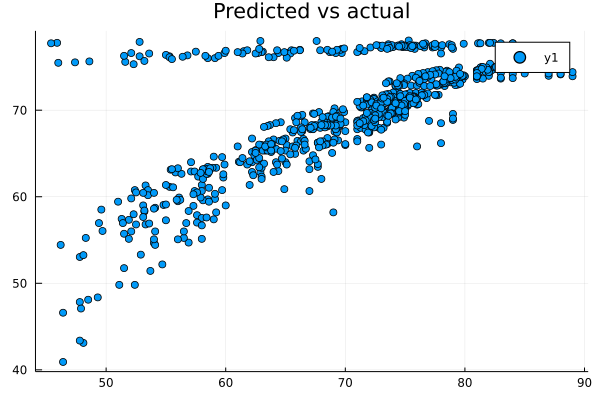

In [29]:
test_plot=scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted],title="Predicted vs actual")

In [30]:
#Cross validation

In [31]:
function cross_validation(train, k, fm = @formula(Life_expentency ~ Adult_Mortality))
    a = collect(Kfold(size(train)[1],k))
    for i in i:k
        row =a[i]
        temp_train = train[row,:]
        temp_test = train[setdiff(1:end,row),:]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:Life_expectancy], y_predicted = predict(linearRegressor, temp_test))
        performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
        
        println("Mean Error For Set &i is: ", mean(abs.(performance_testdf.error)))
    end
end

cross_validation (generic function with 2 methods)

In [34]:
df=DataFrame(CSV.File("Churn_Modelling.csv"))


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
,Int64,Int64,String,Int64,String,String,Int64,Int64,Float64,Int64,Int64,Int64,Float64,Int64
1,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,1.01349e5,1
2,2,15647311,Hill,608,Spain,Female,41,1,83807.9,1,0,1,1.12543e5,0
3,3,15619304,Onio,502,France,Female,42,8,1.59661e5,3,1,0,1.13932e5,1
4,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.6,0
5,5,15737888,Mitchell,850,Spain,Female,43,2,1.25511e5,1,1,1,79084.1,0
6,6,15574012,Chu,645,Spain,Male,44,8,1.13756e5,2,1,0,1.49757e5,1
7,7,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.8,0
8,8,15656148,Obinna,376,Germany,Female,29,4,1.15047e5,4,1,0,1.19347e5,1
9,9,15792365,He,501,France,Male,44,4,1.42051e5,2,0,1,74940.5,0


In [35]:
println(size(df))
describe(df)


(10000, 14)


,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,RowNumber,5000.5,1,5000.5,10000,0,Int64
2,CustomerId,1.56909e7,15565701,1.56907e7,15815690,0,Int64
3,Surname,,Abazu,,Zuyeva,0,String
4,CreditScore,650.529,350,652.0,850,0,Int64
5,Geography,,France,,Spain,0,String
6,Gender,,Female,,Male,0,String
7,Age,38.9218,18,37.0,92,0,Int64
8,Tenure,5.0128,0,5.0,10,0,Int64
9,Balance,76485.9,0.0,97198.5,2.50898e5,0,Float64
